In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv('shoe.csv')

In [67]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [68]:
df1 = df[df['class(y)'] == 'Female']
df2 = df[df['class(y)'] == 'Male']

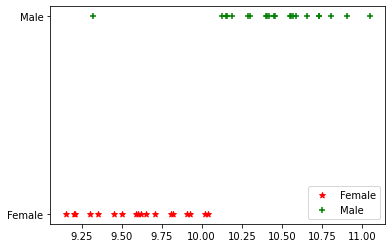

In [69]:
plt.scatter(df1['size(cm)'], df1['class(y)'], color='red', label='Female', marker = '*')
plt.scatter(df2['size(cm)'], df2['class(y)'], color='green', label='Male', marker = '+')
plt.legend()

In [70]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [71]:
df['class(y)'] = le.fit_transform(df['class(y)'])

In [72]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [73]:
import Ipython
from Ipython.display import Image

ModuleNotFoundError: No module named 'Ipython'

In [74]:
#x,y seperate
x = df[['size(cm)']]
y = df['class(y)']

In [20]:
from sklearn.model_selection import train_test_split as tts

In [75]:
xtrain, xtest, ytrain, ytext = tts(x,y,test_size = .30)

In [76]:
xtrain.head()

,size(cm)
23,10.66
15,10.73
2,10.41
12,10.19
3,9.81


In [77]:
xtrain.shape

(28, 1)

In [78]:
xtest.shape

(12, 1)

# Logistic regression Classification

In [79]:
from sklearn.linear_model import LogisticRegression  #import LogisticRegression classification module

In [80]:
reg = LogisticRegression()

In [81]:
reg.fit(xtrain, ytrain)

LogisticRegression()

In [82]:
reg.coef_

array([[2.17326032]])

In [83]:
reg.intercept_

array([-21.5484477])

In [84]:
ypred_1 = reg.predict(xtest)

In [85]:
ypred_1

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [86]:
ytext

4     1
21    0
13    1
29    1
16    0
20    1
27    1
14    1
0     0
6     0
37    1
17    0
Name: class(y), dtype: int32

In [87]:
reg.predict_proba(xtest)

array([[0.07827066, 0.92172934],
       [0.77354958, 0.22645042],
       [0.10323162, 0.89676838],
       [0.14546331, 0.85453669],
       [0.44333926, 0.55666074],
       [0.37515965, 0.62484035],
       [0.12515472, 0.87484528],
       [0.20109756, 0.79890244],
       [0.71145778, 0.28854222],
       [0.73324274, 0.26675726],
       [0.19762873, 0.80237127],
       [0.49199387, 0.50800613]])

In [133]:
logist_r2score = reg.score(xtest, ytext)

In [134]:
logist_r2score

0.8333333333333334

In [135]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [136]:
classification_report(ytext, ypred_1)

'              precision    recall  f1-score   support\n\n           0       1.00      0.60      0.75         5\n           1       0.78      1.00      0.88         7\n\n    accuracy                           0.83        12\n   macro avg       0.89      0.80      0.81        12\nweighted avg       0.87      0.83      0.82        12\n'

In [137]:
print(classification_report(ytext, ypred_1))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.78      1.00      0.88         7

    accuracy                           0.83        12
   macro avg       0.89      0.80      0.81        12
weighted avg       0.87      0.83      0.82        12



In [138]:
CM1 = confusion_matrix(ytext, ypred_1)


In [139]:
CM1

array([[3, 2],
       [0, 7]], dtype=int64)

In [140]:
 logis_accuracy = accuracy_score(ytext, ypred_1)

In [141]:
 logis_accuracy

0.8333333333333334

Text(0.5, 1.0, 'Confusion Matrix')

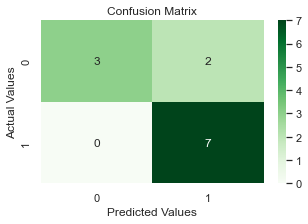

In [142]:
sns.heatmap(CM1, annot=True, cmap = 'Greens' )
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

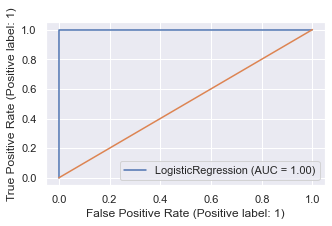

In [154]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(reg, xtest, ytext)
plt.plot([0,1],[0,1])

# Knn classification

In [143]:
from sklearn.neighbors import KNeighborsClassifier #import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [144]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [145]:
ypred_2 = knn.predict(xtest)

In [146]:
ypred_2 

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [147]:
ytext

4     1
21    0
13    1
29    1
16    0
20    1
27    1
14    1
0     0
6     0
37    1
17    0
Name: class(y), dtype: int32

In [149]:
knn_r2score = knn.score(xtest, ytext)

In [155]:
knn_r2score

0.9166666666666666

In [156]:
classification_report(ytext, ypred_2)

'              precision    recall  f1-score   support\n\n           0       1.00      0.80      0.89         5\n           1       0.88      1.00      0.93         7\n\n    accuracy                           0.92        12\n   macro avg       0.94      0.90      0.91        12\nweighted avg       0.93      0.92      0.91        12\n'

In [158]:
print(classification_report(ytext, ypred_2))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.88      1.00      0.93         7

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12



In [160]:
CM2 = confusion_matrix(ytext, ypred_2)

In [161]:
CM2

array([[4, 1],
       [0, 7]], dtype=int64)

In [162]:
 knn_accuracy = accuracy_score(ytext, ypred_2)

In [163]:
knn_accuracy

0.9166666666666666

Text(0.5, 1.0, 'Confusion Matrix')

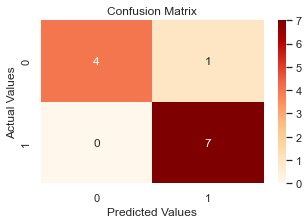

In [165]:
sns.heatmap(CM2, annot=True, cmap = 'OrRd' )
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

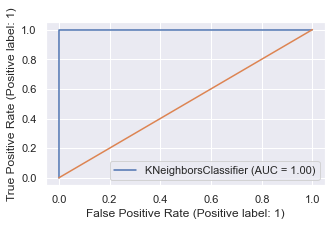

In [166]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn, xtest, ytext)
plt.plot([0,1],[0,1])

In [167]:
accuracy_df = pd.DataFrame([ ['Logistic Regression',  logis_accuracy], ['KNN', knn_accuracy]], columns=['Algorithm Name', 'Accuracy'])

In [168]:
accuracy_df

,Algorithm Name,Accuracy
0,Logistic Regression,0.833333
1,KNN,0.916667


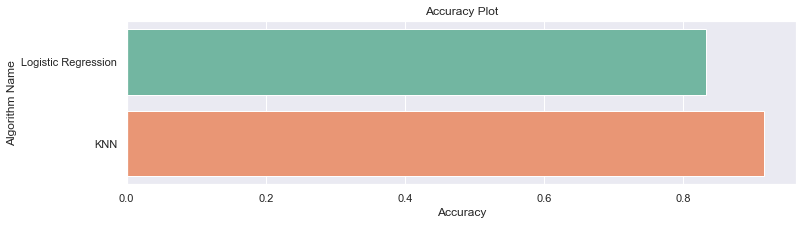

In [182]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=accuracy_df, palette="Set2").set(title='Accuracy Plot')
sns.set(rc={'figure.figsize':(3,12)})

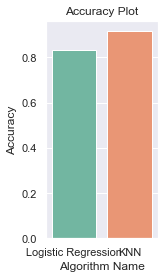

In [180]:
sns.set()
sns.barplot(x="Algorithm Name", y="Accuracy",  data=accuracy_df, palette="Set2").set(title='Accuracy Plot')
sns.set(rc={'figure.figsize':(3,4)})